In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.dropna(inplace=True)

In [7]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape

(571, 2)

In [9]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [11]:
accuracy_score(y_test,y_pred)

0.6503496503496503

In [14]:
np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy'))

0.630281690140845

In [21]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [22]:
trf=ColumnTransformer(
    [
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ]
)

In [24]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [27]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [29]:
trf.named_transformers_['first'].n_bins

10

In [35]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [39]:
output=pd.DataFrame({'age':X_train['Age'],
                     'age_transformed':X_train_trf[:,0],
                    'Fare':X_train['Fare'],
                     'Fare_transformed':X_train_trf[:,-1]})


In [41]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [42]:
output

,age,age_transformed,Fare,Fare_transformed,age_labels,fare_labels
328,31.0,5.0,20.5250,5.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,4.0,14.4542,4.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,5.0,16.1000,5.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,6.0,7.7750,1.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
...,...,...,...,...,...,...
92,46.0,8.0,61.1750,8.0,"(42.0, 50.0]","(51.479, 82.171]"
134,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
337,41.0,7.0,134.5000,9.0,"(36.0, 42.0]","(82.171, 512.329]"
548,33.0,6.0,20.5250,5.0,"(32.0, 36.0]","(15.75, 26.0]"


In [48]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_predict=clf.predict(X_test_trf)
accuracy_score(y_test,y_predict)

0.6223776223776224

In [66]:
kbin_age1=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare1=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [67]:
trf1=ColumnTransformer(
    [
        ('first',kbin_age1,[0]),
        ('second',kbin_fare1,[1])
    ]
)

In [71]:
trf1.named_transformers_

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [68]:
X_train_trf1=trf.fit_transform(X_train)
X_test_trf1=trf.transform(X_test)

In [69]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf1,y_train)
y_predict=clf.predict(X_test_trf1)
accuracy_score(y_test,y_predict)

0.6363636363636364

In [74]:
X_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6247261345852895

In [77]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6344874804381846


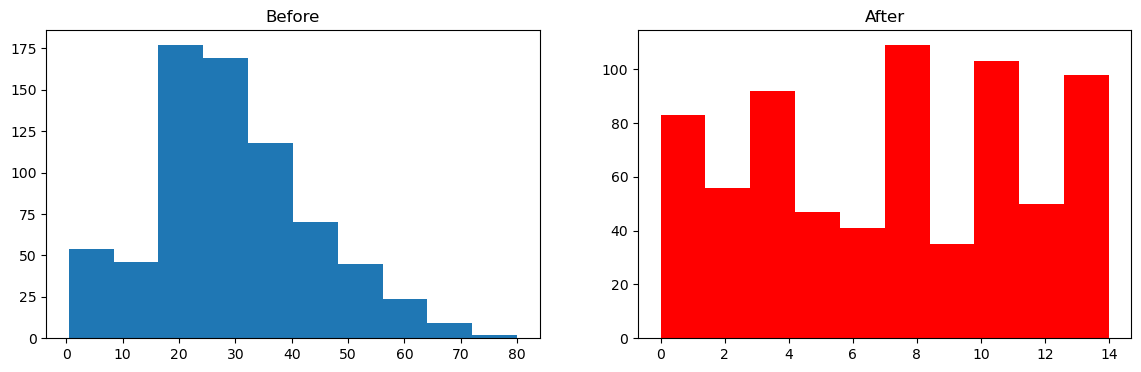

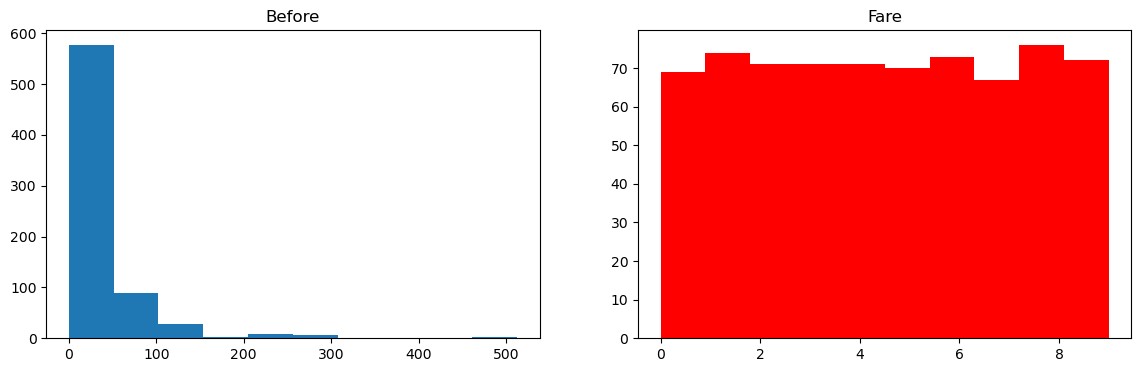

In [78]:
discretize(10,'quantile')

0.6317292644757433


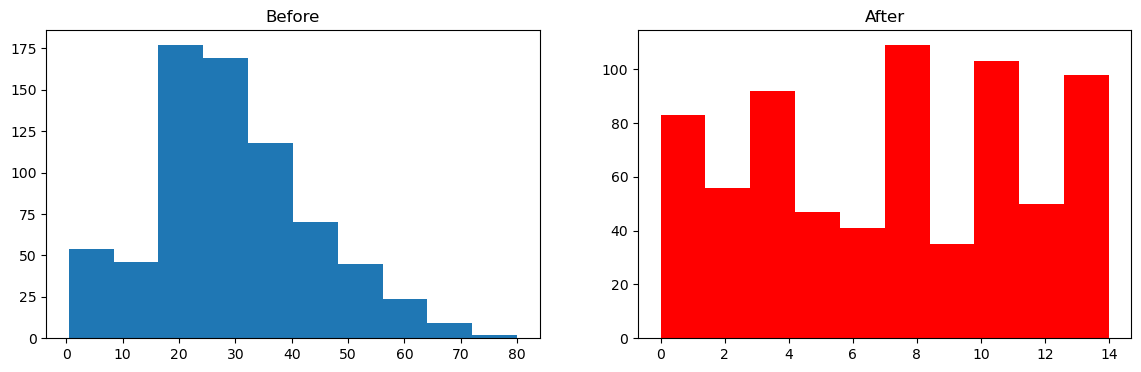

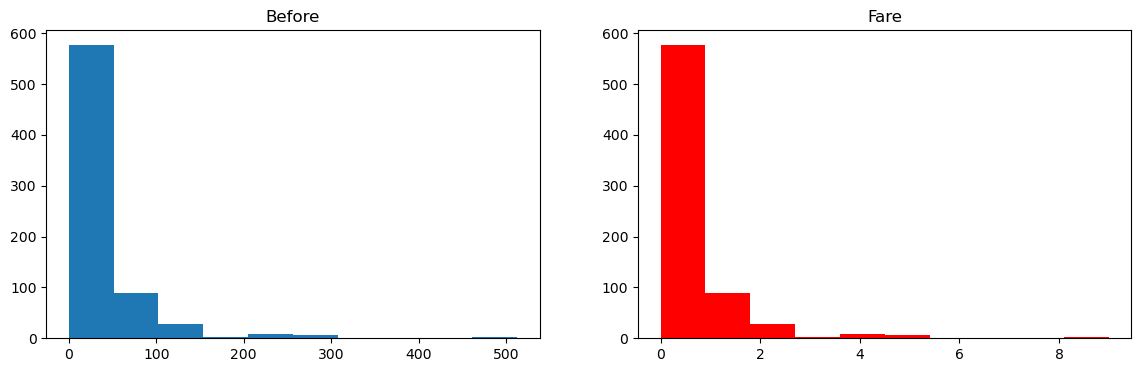

In [79]:
discretize(10,'uniform')

In [81]:
discretize(10,'kmeans')

AttributeError: 'NoneType' object has no attribute 'split'